## Mount Google Drive

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


## Making required folders

In [2]:
# Shows current folder path
!pwd

/content


In [5]:
# Go to required path and show its path
!cd /content/drive/MyDrive/Colab_FOLDER/assignment_0-rodosingh/src/ && pwd

/content/drive/MyDrive/Colab_FOLDER/assignment_0-rodosingh/src


In [8]:
# Create a new folder called 'images' in the root folder
!cd /content/drive/MyDrive/Colab_FOLDER/assignment_0-rodosingh/ && mkdir images

In [9]:
# Shows the contents with their details
!cd /content/drive/MyDrive/Colab_FOLDER/assignment_0-rodosingh/ && ls -l

total 10
drwx------ 2 root root 4096 Aug 22 08:37 images
-rw------- 1 root root 1647 Aug 21 16:50 README.md
drwx------ 2 root root 4096 Aug 22 08:28 src


In [10]:
# Show contents of Assignment_0
!cd /content/drive/MyDrive/Colab_FOLDER/assignment_0-rodosingh/src/ && ls -l

total 2983
-rw------- 1 root root  144356 Aug 21 17:11 1.jpg
-rw------- 1 root root  246486 Aug 21 17:10 2.jpg
-rw------- 1 root root 1739416 Jan 11  2020 3.jpg
-rw------- 1 root root  914934 Jun 22  2019 4.jpg
-rw------- 1 root root    8225 Aug 22 08:38 Assignment_0.ipynb


## Import essential libraries

In [5]:
# Importing the OpenCV and other helper libraries
import cv2
import numpy as np # for maths
import matplotlib.pyplot as plt # for plotting and display
%matplotlib inline
from skimage import io # An Image processing library from Scikit-Learn
from PIL import Image # Again an Image-Preprocessing library
import os

## Load Images using using OpenCV and Display them using matplotlib (making a 2x2 grid)

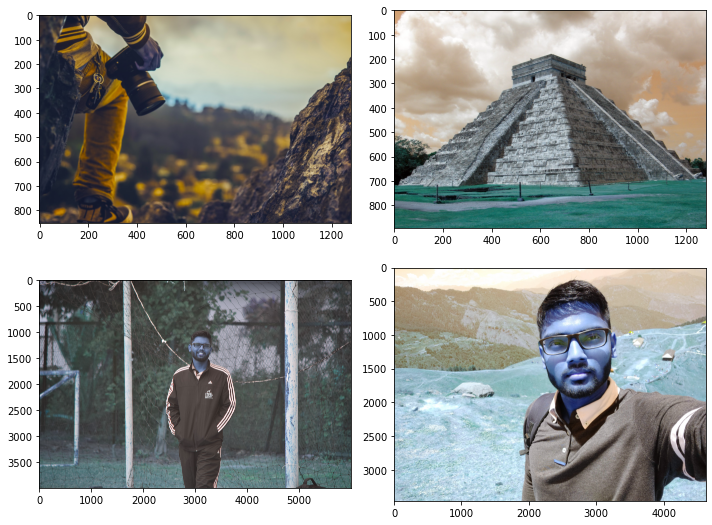

In [6]:
# Define Path for Images
image_path = "/content/drive/MyDrive/Colab_FOLDER/assignment_0-rodosingh/src"
# Load Images
img_list = [cv2.imread(os.path.join(image_path, str(i)+".jpg")) for i in range(1,5)]
# View Images using Matplotlib in 2x2 grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (10,8)); k = 0
for m in range(2):
    for n in range(2):
        axes[m,n].imshow(img_list[k])
        k += 1
fig.tight_layout(rect=[0,0,1,0.95])
plt.show()

__Do above images seem UNUSUAL? Is it due to colors?__

Yes, as the default channel setting in cv2 library for *Image Reading* is __BGR__ instead of __RGB__. So let's fix that in below cell.

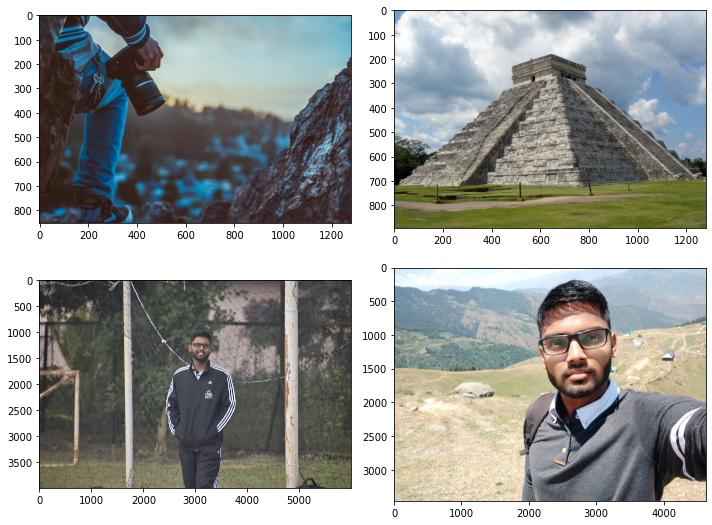

In [7]:
# Load Images with channel converted from BGR to RGB
img_list = [cv2.cvtColor(cv2.imread(os.path.join(image_path, str(i)+".jpg")), cv2.COLOR_BGR2RGB) for i in range(1,5)]
# View Images using Matplotlib in 2x2 grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (10,8)); k = 0
for m in range(2):
    for n in range(2):
        axes[m,n].imshow(img_list[k])
        k += 1
fig.tight_layout(rect=[0,0,1,0.95])
plt.show()

## Convert any one Image to Gray-Scale and save the same to a folder named "images".

In [58]:
# Randomly choose an image from above FOUR.
import random
choice_int = random.randint(1,4)
choice_img = cv2.imread(os.path.join(image_path, str(choice_int)+".jpg")) #obtaining the image array 
# print shape of the loaded image.
print(f"The Dimension of the Chosen Image is = {choice_img.shape}, where\nNo. of Rows = {choice_img.shape[0]}\nNo. of columns = {choice_img.shape[1]}\nNo. of Channels = {choice_img.shape[2]}")

The Dimension of the Chosen Image is = (894, 1280, 3), where
No. of Rows = 894
No. of columns = 1280
No. of Channels = 3


In [62]:
# Check for Range of Values in each channel of the Image.
print(f"Red Channel: np.max Value = {np.max(choice_img[:, :, 2])}, np.min Value = {np.min(choice_img[:, :, 2])}, Range = {np.max(choice_img[:, :, 2])-np.min(choice_img[:, :, 2])}\nGreen Channel: np.max Value = {np.max(choice_img[:, :, 1])}, np.min Value = {np.min(choice_img[:, :, 1])}, Range = {np.max(choice_img[:, :, 1])-np.min(choice_img[:, :, 1])}\nBlue Channel: np.max Value = {np.max(choice_img[:, :, 0])}, np.min Value = {np.min(choice_img[:, :, 0])}, Range = {np.max(choice_img[:, :, 0])-np.min(choice_img[:, :, 0])}\n")

Red Channel: np.max Value = 255, np.min Value = 0, Range = 255
Green Channel: np.max Value = 255, np.min Value = 0, Range = 255
Blue Channel: np.max Value = 255, np.min Value = 0, Range = 255



*According to above output, we arrived at this conclusion that each channel consits of pixels that can take values from 0 to 255 -- That says total 256 possibilities for each pixel. And hence, all these image are* __*8 bits per pixel (as 2^8 = 256) with depth = 8x3 = 24 (, where 3 is for no. of channels)*__

While referring to [wiki](https://en.wikipedia.org/wiki/Grayscale#Converting_color_to_grayscale), I got the following method from RGB to GrayScale which is further taken from __Michael Stokes, Matthew Anderson, Srinivasan Chandrasekar, and Ricardo Motta, "A Standard Default Color Space for the Internet – sRGB", [online](http://www.w3.org/Graphics/Color/sRGB) see matrix at end of Part 2.__

In [49]:
# Merging all the 3 channels into one by averaging across all three channels with equal weightage
choice_img_gray = (0.2126 * choice_img[:, :, 2] + 0.7152 * choice_img[:, :, 1] + 0.0722 * choice_img[:, :, 0]) # since BGR format

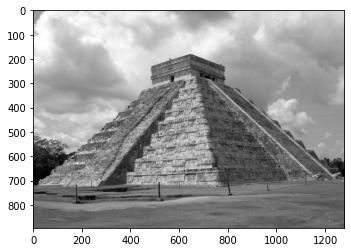



The dimension of Gray Scale Image = (894, 1280)


True

In [57]:
# Show the GrayScale Image, and print its dimension and then save it to "images".
plt.imshow(choice_img_gray, cmap='gray')
plt.show()
# Show dim
print(f"\n\nThe dimension of Gray Scale Image = {choice_img_gray.shape}")
# Save the image
cv2.imwrite(image_path[:-3]+"images/choice_img_gray.jpg", choice_img_gray)

# optional Questions

## 1. Learn to read, show and save images using Scikit-image, PIL and Matplotlib also.

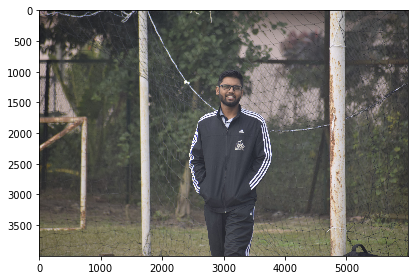

In [69]:
# Scikit-Learn
img_sklearn = io.imread(image_path+"/3.jpg") # read with SKImage
io.imshow(img_sklearn) # Show with skimage
io.imsave(image_path[:-3]+"images/skimage_save.jpg", img_sklearn) # save with skimage

In [81]:
# PIL
img_pil = Image.open(image_path+"/3.jpg") # read with PIL
img_pil.save(image_path[:-3]+"images/PIL_save.jpg") # Save with PIL
img_pil.show()

# " Not able to SHoW the Image???"

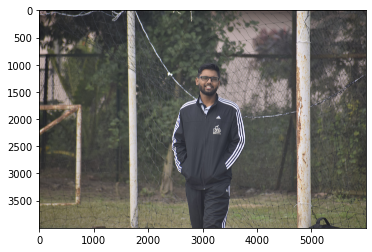

In [71]:
# Matplotlib
img_matplot = plt.imread(image_path + "/3.jpg") # read with matplotlib
plt.imshow(img_matplot); plt.show() # show image
plt.imsave(image_path[:-3]+"images/matplot_save.jpg", img_matplot)# save image

## 2. Capture an image using a webcam, load it and follow the above procedures. Save the image using OpenCV's utility function.

In [10]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename=image_path[:-3]+'images/webcam_photo.jpg', quality=0.9):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to /content/drive/MyDrive/Colab_FOLDER/assignment_0-rodosingh/images/webcam_photo.jpg


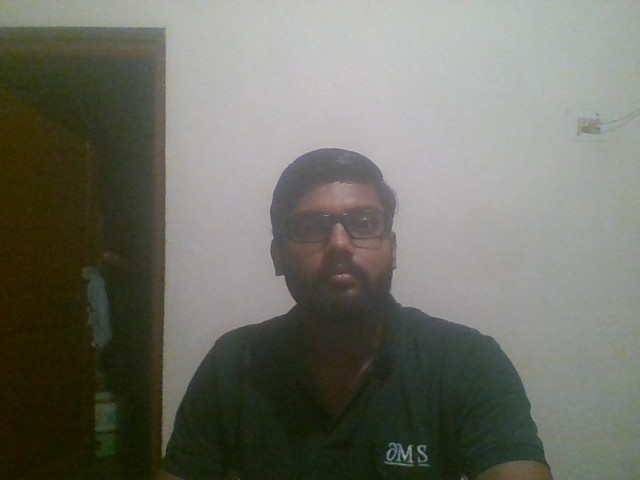

In [11]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))